In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'F:\University\Year 3 Semester 1\CSS342 - Data Sci & Data En\Project_V2\Climate Change\Dataset\nasa_power_prepared_data.csv')

In [4]:
df.head(3)

,date,evland,evptrns,gwetprof,gwetroot,gwettop,hdd0,hdd10,hdd18_3,pbltop,...,day,week,weekday,season_num,et_total,t2m_forecast_7d,rain_forecast_7d,et_forecast_7d,soil_moisture_forecast_7d,wind_forecast_7d
0,1981-01-01,1.88,0.34,0.61,0.61,0.62,0.0,0.0,0.0,93.03,...,1,1,3,0,2.22,27.44,0.06,1.57,0.56,1.95
1,1981-01-02,1.77,0.28,0.61,0.60,0.62,0.0,0.0,0.0,91.99,...,2,1,4,0,2.05,26.87,0.00,1.47,0.55,2.52
2,1981-01-03,1.72,0.24,0.60,0.60,0.62,0.0,0.0,0.0,91.67,...,3,1,5,0,1.96,26.14,0.00,1.40,0.54,3.58


In [5]:
df.columns

Index(['date', 'evland', 'evptrns', 'gwetprof', 'gwetroot', 'gwettop', 'hdd0',
       'hdd10', 'hdd18_3', 'pbltop', 'prectotcorr', 'ps', 'qv10m', 'qv2m',
       'rh2m', 'rhoa', 'slp', 't10m', 't10m_max', 't10m_min', 't10m_range',
       't2m', 't2mdew', 't2mwet', 't2m_max', 't2m_min', 't2m_range', 'to3',
       'tqv', 'troppb', 'tropq', 'tropt', 'ts', 'tsoil1', 'tsoil2', 'tsoil3',
       'tsoil4', 'tsoil5', 'tsoil6', 'tsurf', 'ts_max', 'ts_min', 'ts_range',
       'u10m', 'u2m', 'u50m', 'v10m', 'v2m', 'v50m', 'wd10m', 'wd2m', 'wd50m',
       'ws10m', 'ws10m_max', 'ws10m_min', 'ws10m_range', 'ws2m', 'ws2m_max',
       'ws2m_min', 'ws2m_range', 'ws50m', 'ws50m_max', 'ws50m_min',
       'ws50m_range', 'z0m', 'year', 'month', 'day', 'week', 'weekday',
       'season_num', 'et_total', 't2m_forecast_7d', 'rain_forecast_7d',
       'et_forecast_7d', 'soil_moisture_forecast_7d', 'wind_forecast_7d'],
      dtype='object')

## Feature selection

In [6]:
df.columns

Index(['date', 'evland', 'evptrns', 'gwetprof', 'gwetroot', 'gwettop', 'hdd0',
       'hdd10', 'hdd18_3', 'pbltop', 'prectotcorr', 'ps', 'qv10m', 'qv2m',
       'rh2m', 'rhoa', 'slp', 't10m', 't10m_max', 't10m_min', 't10m_range',
       't2m', 't2mdew', 't2mwet', 't2m_max', 't2m_min', 't2m_range', 'to3',
       'tqv', 'troppb', 'tropq', 'tropt', 'ts', 'tsoil1', 'tsoil2', 'tsoil3',
       'tsoil4', 'tsoil5', 'tsoil6', 'tsurf', 'ts_max', 'ts_min', 'ts_range',
       'u10m', 'u2m', 'u50m', 'v10m', 'v2m', 'v50m', 'wd10m', 'wd2m', 'wd50m',
       'ws10m', 'ws10m_max', 'ws10m_min', 'ws10m_range', 'ws2m', 'ws2m_max',
       'ws2m_min', 'ws2m_range', 'ws50m', 'ws50m_max', 'ws50m_min',
       'ws50m_range', 'z0m', 'year', 'month', 'day', 'week', 'weekday',
       'season_num', 'et_total', 't2m_forecast_7d', 'rain_forecast_7d',
       'et_forecast_7d', 'soil_moisture_forecast_7d', 'wind_forecast_7d'],
      dtype='object')

In [8]:
df = df.sort_values("date")

In [9]:
COLS_TO_DROP_PRE_TRAIN = ["date", "day", "week", "weekday"]

TARGET_COL = "t2m_forecast_7d"

features = [
    col for col in df.columns 
    if col not in COLS_TO_DROP_PRE_TRAIN + [TARGET_COL]
]

In [12]:
# Correlation Matrix Analysis
print(f"Dataset shape: {df.shape}")
print(f"Features to analyze: {len(features)}")
print(f"Target variable: {TARGET_COL}")

# Calculate correlation matrix for all features + target
correlation_data = df[features + [TARGET_COL]]
correlation_matrix = correlation_data.corr()

# Show top correlations with target variable
target_correlations = correlation_matrix[TARGET_COL].abs().sort_values(ascending=False)
print(f"\nTop 15 features correlated with {TARGET_COL}:")
print(target_correlations.head(15))

Dataset shape: (16385, 77)
Features to analyze: 72
Target variable: t2m_forecast_7d

Top 15 features correlated with t2m_forecast_7d:
t2m_forecast_7d    1.000000
tsoil3             0.757813
tsoil2             0.747141
ts                 0.725153
tsoil1             0.724332
tsurf              0.702638
t2m                0.697529
tsoil4             0.696440
t10m               0.675412
t2m_max            0.603067
t10m_max           0.602050
v2m                0.594811
v10m               0.592705
t2m_min            0.589216
t10m_min           0.587345
Name: t2m_forecast_7d, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

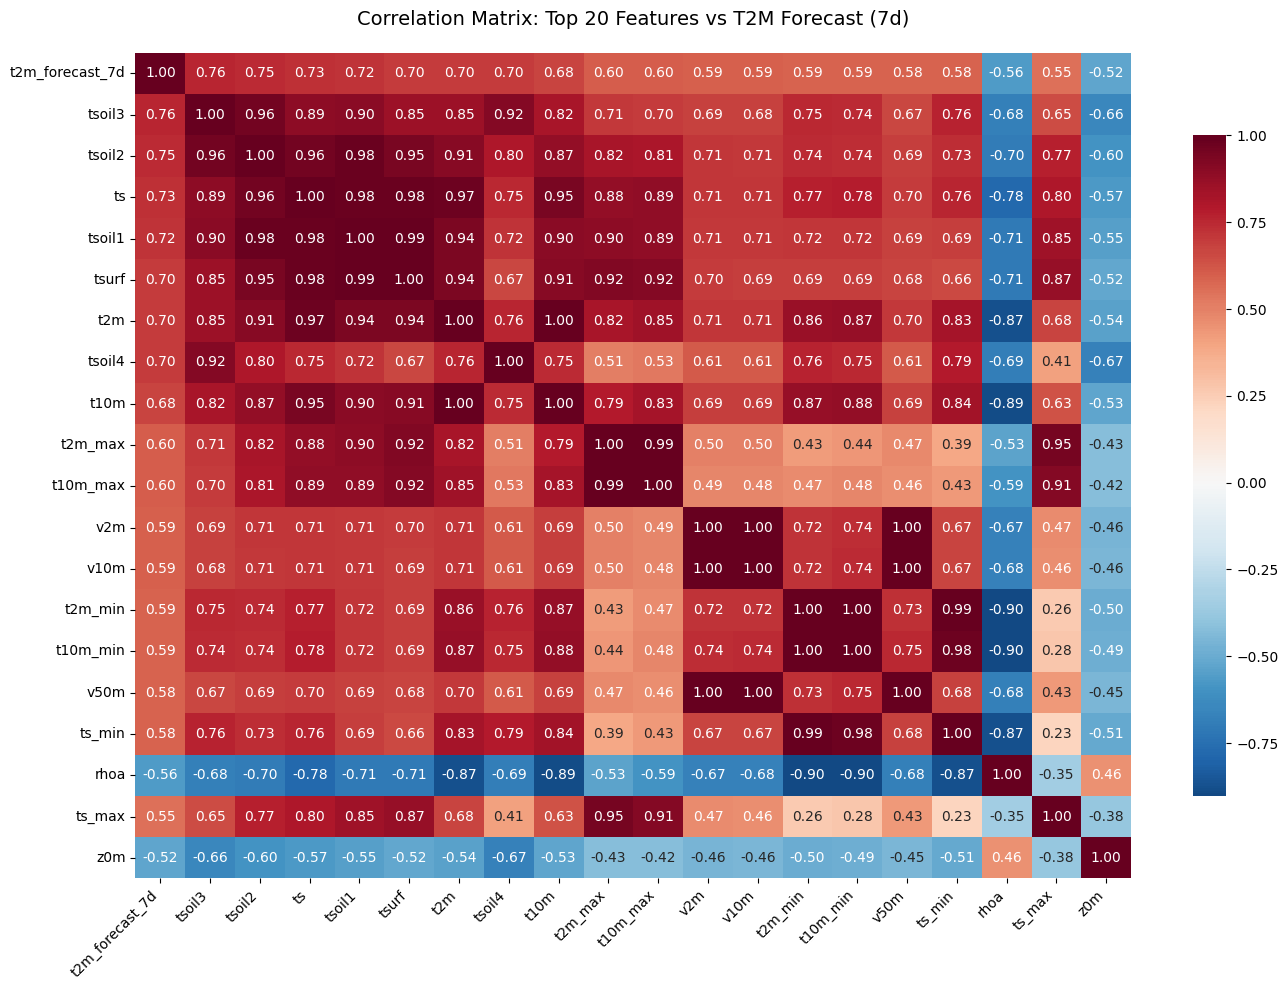

In [16]:
# Heatmap สำหรับ Top Features ที่มี correlation สูงกับ T2M
top_features_for_heatmap = target_correlations.head(20).index.tolist()  # Top 20 including target

plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix.loc[top_features_for_heatmap, top_features_for_heatmap], 
    annot=True, 
    cmap='RdBu_r', 
    center=0,
    fmt='.2f',
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix: Top 20 Features vs T2M Forecast (7d)', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **วิธีอ่าน Correlation Matrix**

#### **Step 1: ดูสี**
```
🔴 สีแดง = ดี (correlation สูง)
⚪ สีขาว = ปกติ (correlation กลาง) 
🔵 สีน้ำเงิน = ดี (correlation ติดลบสูง)
```

#### **Step 2: เลือก Features**
```
✅ เลือก: ค่า > 0.5 (สีเข้ม)
🤔 พิจารณา: ค่า 0.3-0.5 (สีกลาง)
❌ ไม่เลือก: ค่า < 0.3 (สีอ่อน)
```

#### **Step 3: ตัดที่ซ้ำ**
```
หา features ที่มีค่าใกล้กัน > 0.9
→ เลือกแค่ตัวเดียว
```

- **มองจาก target**: ดูแนวตั้ง/นอนของ t2m_forecast_7d
- **เลือก 10-15 ตัว**: พอดี ไม่เยอะเกินไป
- **ตัดคู่ซ้ำ**: เช่น t2m กับ t10m เลือกแค่ตัวเดียว เพราะค่าใกล้กันมากเกินไป(อย่างอันนี้เป็น 1)